# Hulu Marketing Analysis and Ratings Insights

## Background

Hulu is an American subscription streaming service owned by The Walt Disney Company. Launched on October 29, 2007, it was initially established as a joint venture between News Corporation and NBCUniversal, among others. Hulu offers an expansive slate of live and on-demand entertainment, both in and outside the home, through a wide array of subscription options. As of September 30, 2023, it has 48.5 million users. Hulu’s streaming library includes last night’s episodes from most major network shows, full seasons of hit shows, award-winning original series, documentaries, movies, and more.

### Business Objectives

1. Which television shows exhibit the highest ratings on Hulu?
2. What genres consistently demonstrate elevated ratings on Hulu?
3. How could these trends help influence Hulu's marketing strategy?

***

## Data Source

The dataset used is publicly available on Kaggle: [Hulu Popular Shows Dataset](https://www.kaggle.com/datasets/thedevastator/hulu-popular-shows-dataset).

***

## Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/HuluRaw.csv")

In [3]:
df.head(5)

,index,show/id,show/cache_time,show/canonical_name,show/clips_count,show/description,show/episodes_count,show/feature_films_count,show/film_clips_count,show/genre,...,show/show_rollups/showtime/html5_games_count,show/show_rollups/showtime/html5_feature_films_count,show/show_rollups/showtime/html5_film_clips_count,show/show_rollups/showtime/html5_film_trailers_count,show/show_rollups/showtime/html5_videos_count,show/show_rollups/showtime/non_rating_videos_count,show/show_rollups/showtime/highest_rating,show/annotations/0,show/annotations/1,Unnamed: 181
0,0,54,2017-08-10T14:53:04+00:00,family-guy,288,The adventures of an endearingly ignorant dad ...,288,0,0,Animation and Cartoons,...,0,0,0,0,288,0,TV-MA,NaN,NaN,NaN
1,1,6979,2017-08-10T14:14:33+00:00,south-park,3874,"Underpants-stealing gnomes, a talking Christma...",274,0,0,Comedy,...,0,0,0,0,4148,0,TV-MA,NaN,NaN,NaN
2,2,53,2017-08-10T14:46:51+00:00,american-dad,121,This screwball family full of radically differ...,172,0,0,Comedy,...,0,0,0,0,121,0,TV-14,NaN,NaN,NaN
3,3,389,2017-08-10T15:00:39+00:00,law-and-order-special-victims-unit,176,This hard-hitting and emotional series from NB...,406,0,0,Drama,...,0,0,0,0,176,0,TV-14,NaN,NaN,NaN
4,4,1603,2017-08-10T14:54:31+00:00,naruto-shippuden,16,The Village Hidden in the Leaves is home to th...,597,0,0,Anime,...,0,0,0,0,612,1,TV-14,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
show/id,1000.0,10497.292,8648.011122,10.0,2324.00,7889.0,17312.00,29524.0
show/clips_count,1000.0,230.023,796.309001,0.0,1.00,38.5,155.00,7073.0
show/episodes_count,1000.0,117.158,134.999325,0.0,24.00,86.0,156.00,747.0
show/feature_films_count,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
show/show_rollups/showtime/html5_feature_films_count,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
show/show_rollups/showtime/html5_film_clips_count,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
show/show_rollups/showtime/html5_film_trailers_count,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
show/show_rollups/showtime/html5_videos_count,1000.0,252.904,787.949941,0.0,0.00,65.0,198.75,7066.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 183 entries, index to Unnamed: 181
dtypes: bool(6), float64(3), int64(123), object(51)
memory usage: 1.4+ MB


In [6]:
len(df.columns)

183

In [7]:
df.isnull().sum()

index                                                   0
show/id                                                 0
show/cache_time                                         0
show/canonical_name                                     0
show/clips_count                                        0
                                                     ... 
show/show_rollups/showtime/non_rating_videos_count      0
show/show_rollups/showtime/highest_rating              40
show/annotations/0                                    690
show/annotations/1                                    962
Unnamed: 181                                          996
Length: 183, dtype: int64

#### **Remove unnecessary columns**

In [8]:
col_list = ['show/name','show/genre', 'show/show_rollups/free/released_at','show/episodes_count', 'show/rating', 'show/seasons_count']
hulu_df = df[col_list]

#### **Rename columns**

In [9]:
hulu_df = hulu_df.rename(columns={'show/episodes_count': 'episode_count',
                   'show/genre': 'genre',
                   'show/name': 'name',
                   'show/rating': 'rating',
                   'show/show_rollups/free/released_at': 'release_date',
                   'show/seasons_count':'num_seasons'})
hulu_df

,name,genre,release_date,episode_count,rating,num_seasons
0,Family Guy,Animation and Cartoons,2007-09-05T19:01:09Z,288,4.353707,15
1,South Park,Comedy,2011-06-15T03:26:09Z,274,4.363032,20
2,American Dad!,Comedy,2007-09-21T23:03:15Z,172,4.114007,9
3,Law & Order: Special Victims Unit,Drama,2007-10-07T01:50:50Z,406,4.622856,18
4,Naruto Shippuden,Anime,2008-12-04T01:22:06Z,597,4.400626,9
...,...,...,...,...,...,...
995,East Los High,Drama,2013-04-29T06:00:10Z,60,4.156869,4
996,Sesame Street,Kids,2016-01-27T20:47:19Z,60,3.363742,3
997,Casual,Comedy,2015-10-01T00:37:16Z,36,4.536517,3
998,Chicago P.D.,Drama,2013-12-19T03:22:10Z,23,4.549656,1


In [10]:
hulu_df.isnull().sum()

name               0
genre              0
release_date     284
episode_count      0
rating             0
num_seasons        0
dtype: int64

In [11]:
hulu_df = hulu_df.dropna()

In [12]:
hulu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           716 non-null    object 
 1   genre          716 non-null    object 
 2   release_date   716 non-null    object 
 3   episode_count  716 non-null    int64  
 4   rating         716 non-null    float64
 5   num_seasons    716 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 39.2+ KB


##### **Convert object columns to their specific data types**
1. Convert 'name' to String 
2. Convert 'genre' to String
3. Convert 'realeased_at' to DateTime 

In [13]:
hulu_df['name'] = hulu_df['name'].astype('string')
hulu_df['genre'] = hulu_df['genre'].astype('string')
hulu_df['release_date'] =  pd.to_datetime(hulu_df['release_date'])

C:\Users\tanve\AppData\Local\Temp\ipykernel_16584\2781643210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df['name'] = hulu_df['name'].astype('string')
C:\Users\tanve\AppData\Local\Temp\ipykernel_16584\2781643210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_df['genre'] = hulu_df['genre'].astype('string')
C:\Users\tanve\AppData\Local\Temp\ipykernel_16584\2781643210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [14]:
hulu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   name           716 non-null    string             
 1   genre          716 non-null    string             
 2   release_date   716 non-null    datetime64[ns, UTC]
 3   episode_count  716 non-null    int64              
 4   rating         716 non-null    float64            
 5   num_seasons    716 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), string(2)
memory usage: 39.2 KB


In [15]:
# hulu_df.to_csv('./data/hulu_shows.csv', index=False)

In [16]:
hulu_df['name'].value_counts()

name
Brooklyn Nine-Nine              10
Bob's Burgers                   10
The Amazing World of Gumball    10
The Simpsons                    10
Grey's Anatomy                  10
                                ..
American Dad!                    3
Casual                           3
South Park                       2
Chicago P.D.                     2
Family Guy                       1
Name: count, Length: 79, dtype: Int64

##### **Find and delete duplicate shows** 

In [17]:
duplicate_name_filter = hulu_df[['name','release_date']].duplicated(keep='first')


In [18]:
duplicate_name_filter.value_counts()

True     637
False     79
Name: count, dtype: int64

In total there are 79 shows that have duplicate entries, the number of duplicate entries in the entire dataframe is 716

**Delete TV shows that have the same name, release date, and episode count to avoid duplicate entries in our analysis**

In [19]:
hulu_originals = hulu_df.drop_duplicates(subset=['name','release_date','episode_count'], keep='first', ignore_index=True)

hulu_originals['name'].value_counts()

name
Family Guy                           1
South Park                           1
American Dad!                        1
Law & Order: Special Victims Unit    1
Naruto Shippuden                     1
                                    ..
Clarence                             1
East Los High                        1
Sesame Street                        1
Casual                               1
Chicago P.D.                         1
Name: count, Length: 79, dtype: Int64

In [20]:
hulu_originals

,name,genre,release_date,episode_count,rating,num_seasons
0,Family Guy,Animation and Cartoons,2007-09-05 19:01:09+00:00,288,4.353707,15
1,South Park,Comedy,2011-06-15 03:26:09+00:00,274,4.363032,20
2,American Dad!,Comedy,2007-09-21 23:03:15+00:00,172,4.114007,9
3,Law & Order: Special Victims Unit,Drama,2007-10-07 01:50:50+00:00,406,4.622856,18
4,Naruto Shippuden,Anime,2008-12-04 01:22:06+00:00,597,4.400626,9
...,...,...,...,...,...,...
74,Clarence,Animation and Cartoons,2015-06-26 19:53:11+00:00,77,3.347238,2
75,East Los High,Drama,2013-04-29 06:00:10+00:00,60,4.156869,4
76,Sesame Street,Kids,2016-01-27 20:47:19+00:00,60,3.363742,3
77,Casual,Comedy,2015-10-01 00:37:16+00:00,36,4.536517,3


In [21]:
hulu_originals.describe().T

,count,mean,std,min,25%,50%,75%,max
episode_count,79.0,120.164557,154.742584,0.000000,21.500000,62.000000,163.500000,747.000000
rating,79.0,4.246258,0.424342,2.927638,4.118752,4.365803,4.550688,4.795633
num_seasons,79.0,4.987342,5.024284,0.000000,1.000000,4.000000,7.000000,26.000000


### Episode Count Analysis
* The average number of episodes for the shows in the dataset is approximately 120.16.
* The standard deviation is quite high (154.74), indicating a significant variation in the number of episodes among different shows. Some shows may have a very high number of episodes, leading to the large spread.
* The minimum number of episodes is 0, which might indicate movies. The maximum is 747, suggesting there are shows with a large number of episodes which have run on for many years such as Law & Order: Special Victims Unit or Naruto Shippuden.
* The quartiles (25%, 50%, 75%) gives an idea of the distribution of episode counts. For example, 75% of the shows have 163 episodes or fewer.

### Ratings Analysis
- The average rating across all shows is approximately 4.25.
- The standard deviation is relatively low (0.42), suggesting that the ratings are clustered around the mean. This indicates less variability in ratings compared to the variability in the number of episodes.
- The minimum rating is 2.93, and the maximum is 4.80, showing a relatively narrow range of ratings.
- The quartiles gives an idea of the spread of ratings. For instance, 75% of the shows have a rating of 4.55 or lower.

In [22]:
top_10_shows = hulu_originals.nlargest(10, 'rating')
top_10_shows

,name,genre,release_date,episode_count,rating,num_seasons
49,This Is Us,Drama,2016-09-08 22:21:22+00:00,18,4.795633,1
20,Rick and Morty,Animation and Cartoons,2015-05-01 06:50:00+00:00,21,4.772880,2
19,Once Upon a Time,Drama,2011-05-17 19:35:12+00:00,22,4.715776,1
47,Scandal,Drama,2012-03-24 00:03:18+00:00,5,4.711271,1
44,Arrested Development,Comedy,2007-10-07 06:13:57+00:00,53,4.687831,3
35,Broad City,Comedy,2016-03-09 07:00:27+00:00,30,4.642177,3
6,Modern Family,Comedy,2009-09-02 21:10:10+00:00,22,4.640557,1
65,Chicago Fire,Drama,2012-08-17 22:25:05+00:00,5,4.632562,1
67,Lucifer,Drama,2015-12-07 22:06:24+00:00,31,4.630420,2
3,Law & Order: Special Victims Unit,Drama,2007-10-07 01:50:50+00:00,406,4.622856,18


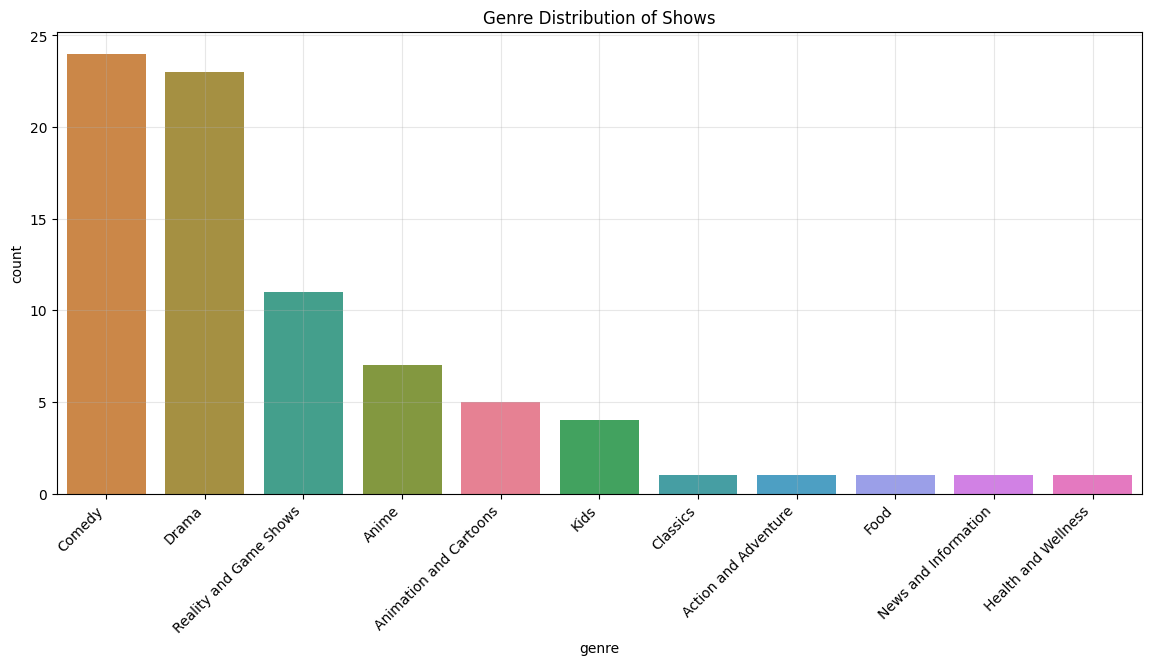

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(x='genre', 
              data=hulu_originals, 
              order=hulu_originals['genre'].value_counts().index,
              hue='genre')
plt.title('Genre Distribution of Shows')
plt.xticks(rotation=45,ha='right')
plt.grid(alpha=0.3)
plt.show()

In this bar chart, we are looking at the genre distribution of shows on Hulu.
 * The discerned findings reveal a predominant presence of comedies and dramas within Hulu's content portfolio.
 * Additionally, noteworthy instances of Reality and Game Shows, along with animated content, contribute to the diverse array of genres offered by Hulu.

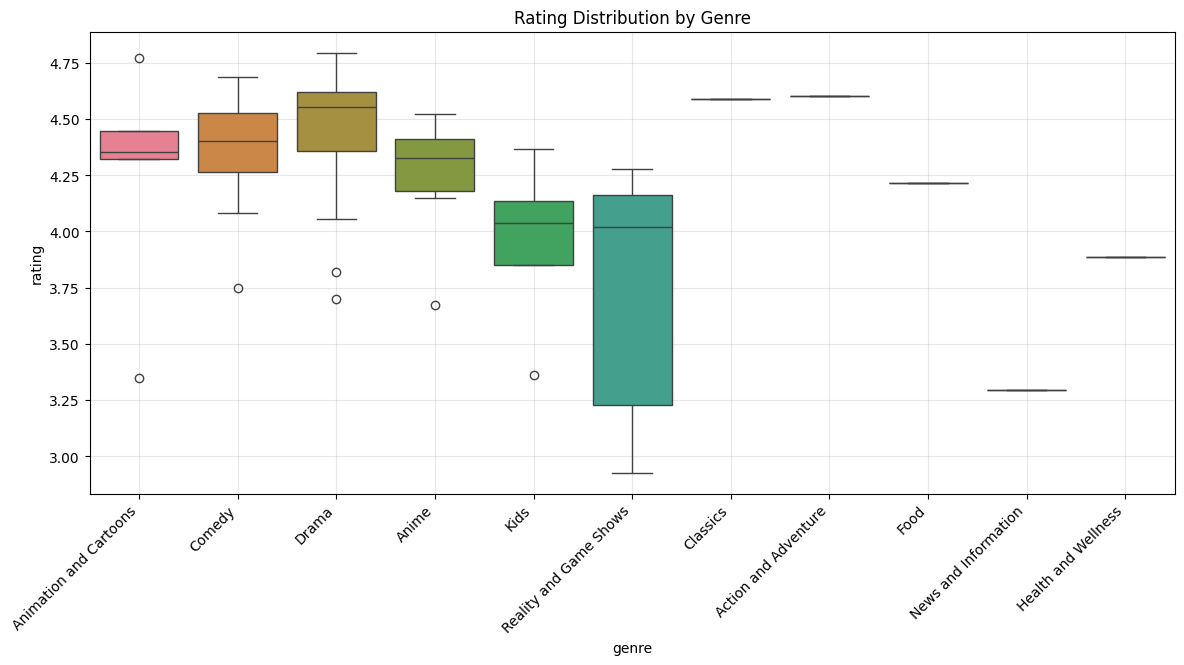

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='genre', y='rating', data=hulu_originals, hue='genre')
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=45,ha='right')
plt.grid(alpha=0.3)
plt.show()

This box plot analysis focuses on the examination of the rating distribution by genre within the dataset.
* Findings indicate that the genres with the highest ratings include comedy, animation and cartoons, anime, and drama. It is pertinent to note that, with the exception of a few outliers, the rating ranges within each genre are comparatively modest.
* Conversely, reality and game shows exhibits a considerable degree of variance, suggesting a diverse range of reviews for shows falling under this category on Hulu. This variability in ratings implies that the reception of reality and game shows on the platform is more mixed compared to other genres.

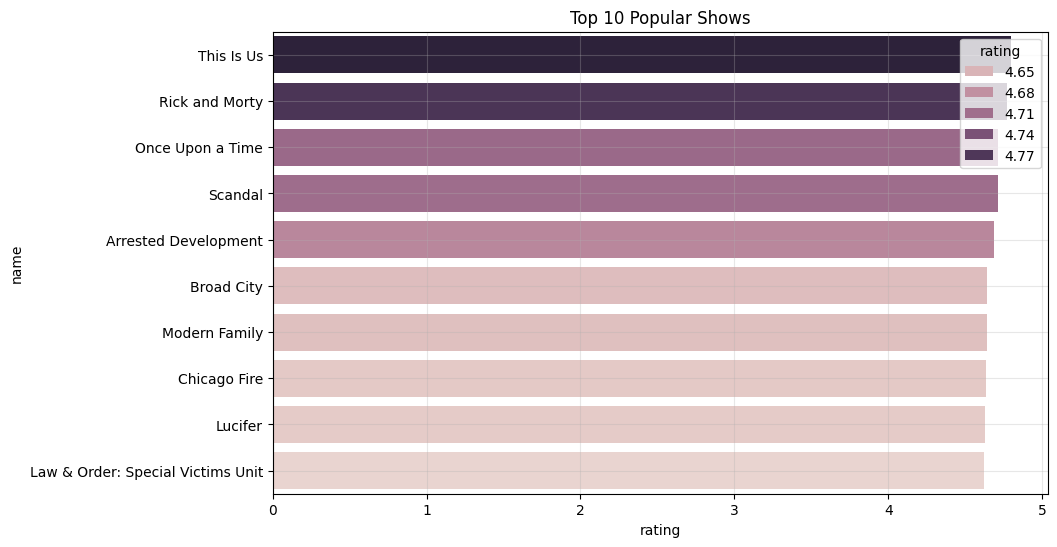

In [25]:
top_10_popular_shows = hulu_originals.nlargest(10, 'rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_10_popular_shows, hue='rating')
plt.title('Top 10 Popular Shows')
plt.grid(alpha=0.3)
plt.show()

The bar chart depicting the top 10 popular shows on Hulu provides a clear and visually compelling overview of the platform's most-watched content.
* "This Is Us" emerges as the frontrunner in terms of popularity, closely followed by "Rick and Morty" and "Once Upon a Time."
* The chart visually showcases the diverse range of genres represented within the top 10, including drama, animation, comedy, and crime.
* The presence of long-running series such as "Law & Order: Special Victims Unit" and "Modern Family" suggests that both enduring favorites and newer releases contribute to Hulu's top-tier content.

## Insights

* Hulu's content portfolio is dominated by comedies and dramas. There is also a oteworthy presence of Reality and Game Shows, along with animated content, contributes to genre diversity.
* Genres with the highest ratings are comedy, animation and cartoons, anime, and drama. Considerable variance in ratings for reality and game shows suggests mixed reception.
* "This Is Us" leads as the most popular show on Hulu, followed by "Rick and Morty" and "Once Upon a Time." The top 10 shows cover a diverse range of genres, including drama, animation, and comedy. Long-running series like "Law & Order: Special Victims Unit" and "Modern Family" contribute to Hulu's popular content.

### Recommendations

* Given the popularity of comedies and dramas, Hulu should continue investing in and acquiring content in these genres. Exploring opportunities to expand the animated content library can cater to a significant audience.
* Considering the variability in ratings for reality and game shows, Hulu may want to implement stringent quality control measures for this genre. Understanding audience preferences within this category can guide content acquisition and production decisions.
* Capitalize on the popularity of top shows like "This Is Us" by featuring them prominently in promotional activities. Implement effective curation algorithms to help users discover a diverse range of content, including both long-running favorites and newer releases.

In [26]:
hulu_originals

,name,genre,release_date,episode_count,rating,num_seasons
0,Family Guy,Animation and Cartoons,2007-09-05 19:01:09+00:00,288,4.353707,15
1,South Park,Comedy,2011-06-15 03:26:09+00:00,274,4.363032,20
2,American Dad!,Comedy,2007-09-21 23:03:15+00:00,172,4.114007,9
3,Law & Order: Special Victims Unit,Drama,2007-10-07 01:50:50+00:00,406,4.622856,18
4,Naruto Shippuden,Anime,2008-12-04 01:22:06+00:00,597,4.400626,9
...,...,...,...,...,...,...
74,Clarence,Animation and Cartoons,2015-06-26 19:53:11+00:00,77,3.347238,2
75,East Los High,Drama,2013-04-29 06:00:10+00:00,60,4.156869,4
76,Sesame Street,Kids,2016-01-27 20:47:19+00:00,60,3.363742,3
77,Casual,Comedy,2015-10-01 00:37:16+00:00,36,4.536517,3


In [27]:
genre_groupby = hulu_originals[['episode_count','rating','genre']].groupby('genre').sum()
genre_groupby_sorted=genre_groupby.sort_values(by='episode_count',ascending=False)

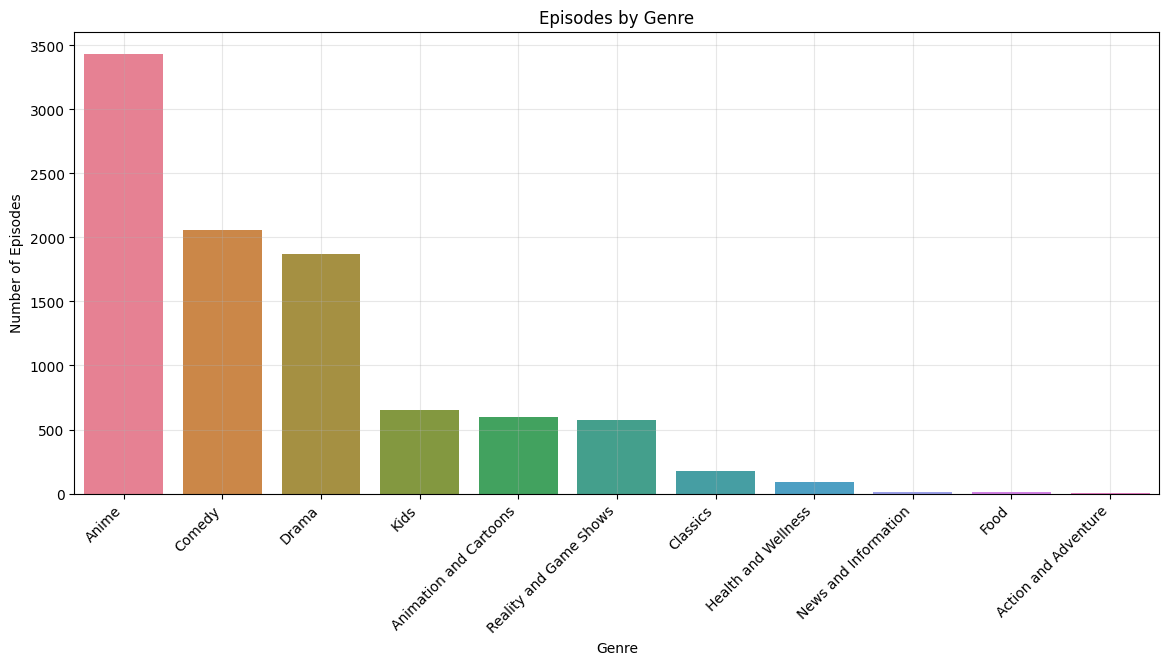

In [28]:
plt.figure(figsize=(14, 6))
sns.barplot(x=genre_groupby_sorted.index, 
            y=genre_groupby_sorted['episode_count'], 
            hue=genre_groupby_sorted.index)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.xlabel('Genre')
plt.ylabel('Number of Episodes')
plt.title("Episodes by Genre")
plt.show()

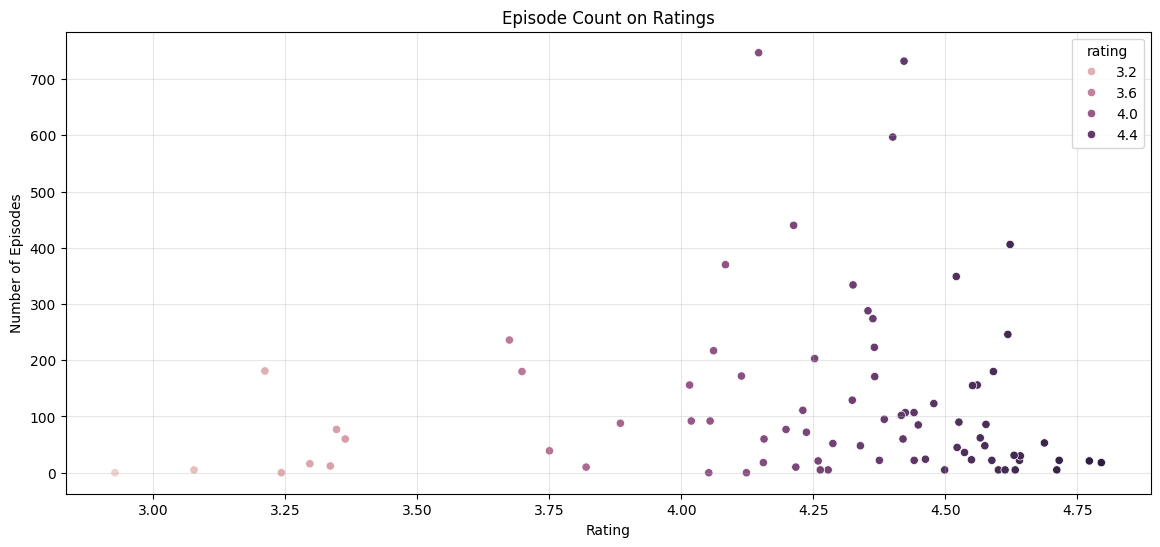

In [29]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=hulu_originals, x='rating',y='episode_count', hue='rating')
plt.grid(alpha=0.3)
plt.xlabel('Rating')
plt.ylabel('Number of Episodes')
plt.title('Episode Count on Ratings')
plt.show()

C:\Users\tanve\AppData\Local\Temp\ipykernel_16584\186100874.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")


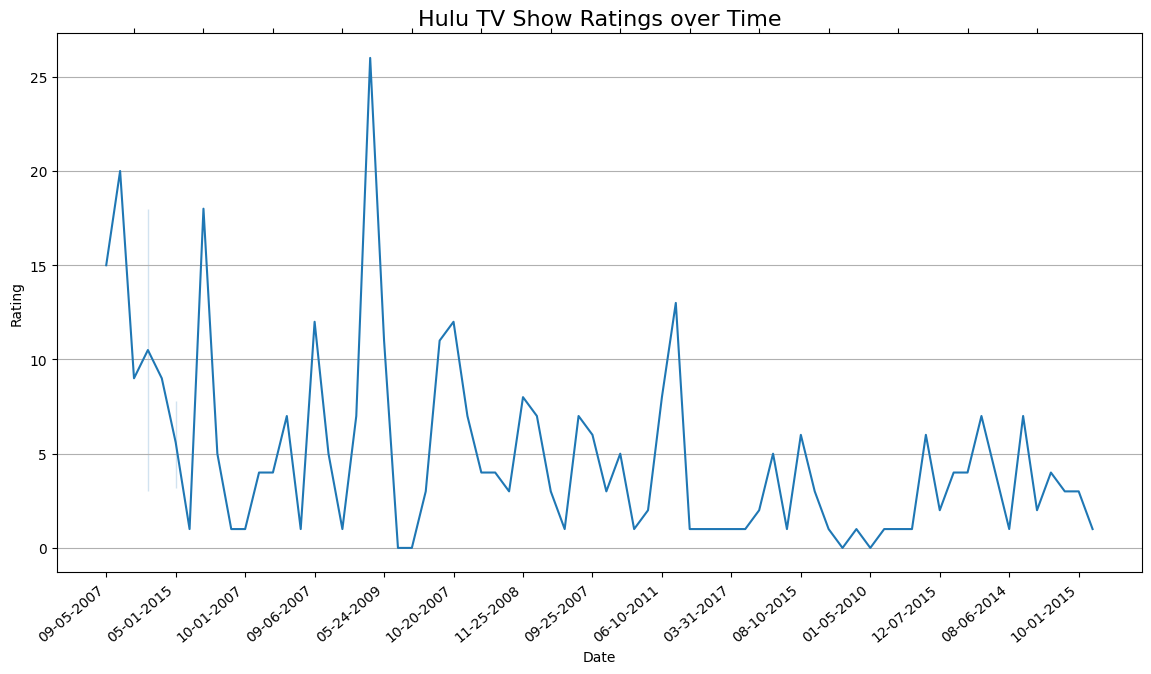

In [31]:
fig1, ax1 = plt.subplots(figsize=(14,7))
ax1 = sns.lineplot(x=hulu_originals["release_date"].dt.strftime('%m-%d-%Y'), 
                  y=hulu_originals["num_seasons"])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.ticklabel_format(axis='y', style='plain')
ax1.set_ylabel('Rating')
ax1.set_xlabel('Date')

ax1.set_title('Hulu TV Show Ratings over Time', fontsize=16)

for index, tickLabel in enumerate(ax1.get_xticklabels()):
    if index%5==0:
        tickLabel.set_visible(True)
    else:
        tickLabel.set_visible(False)
        
for index, tick in enumerate(ax1.get_xticklines()):
    if index%5==0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

ax1.grid(True,axis='y')